In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
import torch

In [3]:
mask_dir = '/home/jupyter/data/OC_patient_018/segment_001/datasets/mask.png'
seg_dir = '/home/jupyter/data/OC_patient_018/segment_001/datasets/tool_segmentation/0000.png'

In [4]:
mask = Image.open(mask_dir)
seg = Image.open(seg_dir)

# Convert to tensor
mask = T.ToTensor()(mask).permute(1,2,0)
seg = T.ToTensor()(seg).permute(1,2,0)

beta_weight = 0.5
combined = ((seg * (1 - beta_weight)) + (mask * beta_weight))



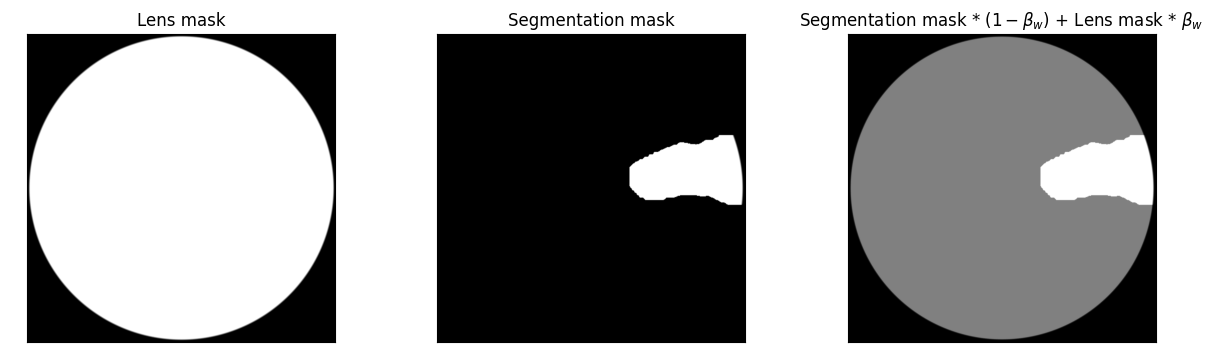

In [5]:
plt.subplots(figsize=(15, 4))
plt.axis('off')
plt.subplot(131)
plt.title("Lens mask")
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.title("Segmentation mask")
plt.imshow(seg * mask, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.title("Segmentation mask * $(1- \\beta_w)$ + Lens mask * $\\beta_w$")
plt.imshow(combined * mask, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()


([], [])

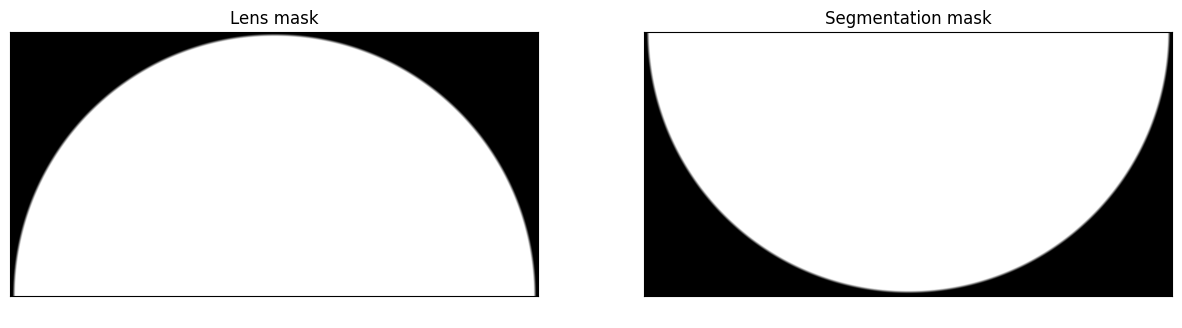

In [12]:

img_h = mask.shape[0]
img_top, img_bottom = torch.split(mask, [img_h // 2, img_h // 2], dim=0)

plt.subplots(figsize=(15, 4))
plt.axis('off')
plt.subplot(121)
plt.title("Lens mask")
plt.imshow(img_top, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("Segmentation mask")
plt.imshow(img_bottom, cmap='gray')
plt.xticks([])
plt.yticks([])
